<a href="https://colab.research.google.com/github/anhhao04/NguyenAnhHao-20104006.github.io/blob/main/AI_27_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

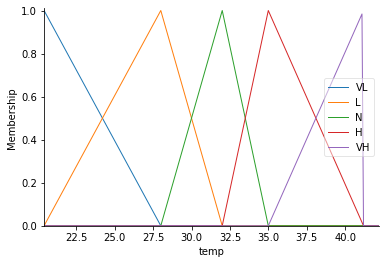

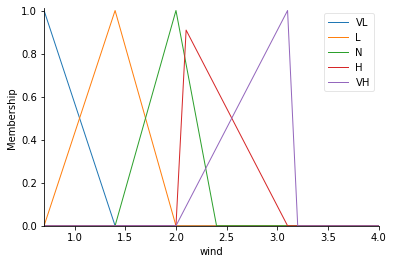

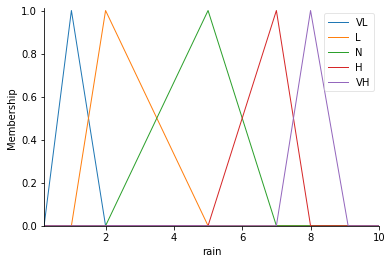

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temp = ctrl.Antecedent(np.arange(20.4,42.2,.1),'temp') 
wind = ctrl.Antecedent(np.arange(0.7,4.1,.1),'wind')
rain = ctrl.Consequent(np.arange(0.2,10.1,.1),'rain') 
temp['VL'] = fuzz.trimf(temp.universe,[20.4,20.4,28])
temp['L'] = fuzz.trimf(temp.universe,[20.4,28,32])
temp['N'] = fuzz.trimf(temp.universe,[28,32,35])
temp['H'] = fuzz.trimf(temp.universe,[32,35,41.2])
temp['VH'] = fuzz.trimf(temp.universe,[35,41.2,41.2])
wind['VL'] = fuzz.trimf(wind.universe,[0.7,0.7,1.4])
wind['L'] = fuzz.trimf(wind.universe,[0.7,1.4,2])
wind['N'] = fuzz.trimf(wind.universe,[1.4,2,2.4])
wind['H'] = fuzz.trimf(wind.universe,[2,2,3.1])
wind['VH'] = fuzz.trimf(wind.universe,[2,3.1,3.1])
rain['VL'] = fuzz.trimf(rain.universe,[0.2,1,2])
rain['L'] = fuzz.trimf(rain.universe,[1,2,5])
rain['N'] = fuzz.trimf(rain.universe,[2,5,7])
rain['H'] = fuzz.trimf(rain.universe,[5,7,8])
rain['VH'] = fuzz.trimf(rain.universe,[7,8,9.1])
temp.view()
wind.view()            
rain.view() 


4.899971070196104


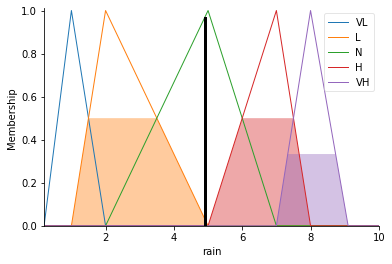

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rule1 = ctrl.Rule(temp['VL'] & wind['VL'],rain['VL'])
rule2 = ctrl.Rule(temp['VL']&wind['L'],rain['VL'])
rule3 = ctrl.Rule(temp['VL'] & wind['N'],rain['VL'])
rule4 = ctrl.Rule(temp['VL'] & wind['H'],rain['L'])
rule5 = ctrl.Rule(temp['VL'] & wind['VH'],rain['H'])
rule6 = ctrl.Rule(temp['L'] & wind['VL'],rain['H'])
rule7 = ctrl.Rule(temp['L'] & wind['L'],rain['VH'])
rule8 = ctrl.Rule(temp['L'] & wind['N'],rain['H'])
rule9 = ctrl.Rule(temp['L'] & wind['H'],rain['N'])
rule10 = ctrl.Rule(temp['L'] & wind['VH'],rain['N'])
rule11 = ctrl.Rule(temp['N'] & wind['VL'],rain['L'])
rule12 = ctrl.Rule(temp['N'] & wind['L'],rain['L'])
rule13 = ctrl.Rule(temp['N'] & wind['N'],rain['L'])
rule14 = ctrl.Rule(temp['N'] & wind['H'],rain['H'])
rule15 = ctrl.Rule(temp['N'] & wind['VH'],rain['VL'])
rule16 = ctrl.Rule(temp['H'] & wind['VL'],rain['L'])
rule17 = ctrl.Rule(temp['H'] & wind['L'],rain['L'])
rule18 = ctrl.Rule(temp['H'] & wind['N'],rain['H'])
rule19 = ctrl.Rule(temp['H'] & wind['H'],rain['VH'])
rule20 = ctrl.Rule(temp['H'] & wind['VH'],rain['VH'])
rule21 = ctrl.Rule(temp['VH'] & wind['VL'],rain['VH'])
rule22 = ctrl.Rule(temp['VH'] & wind['L'],rain['N'])
rule23= ctrl.Rule(temp['VH'] & wind['N'],rain['L'])
rule24 = ctrl.Rule(temp['VH'] & wind['H'],rain['H'])
rule25 = ctrl.Rule(temp['VH'] & wind['VH'],rain['N'])
raining_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
raining = ctrl.ControlSystemSimulation(raining_ctrl)
raining.input['temp']= 30      
raining.input['wind']= 1.8
raining.compute()
print(raining.output['rain'])
rain.view(sim=raining)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Salary_Data.csv')
data.head(10)
data.shape
x = data.drop(['Salary'],axis=True)
y = data['Salary']


In [ ]:
from posixpath import split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
sns.pairplot(data)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test).round(1)
Col = pd.DataFrame(np.c_[y_test,y_pred],columns=['Original Salary','Predicted Salary'])
Col
print('Coeffient',model.coef_)
print('Intercept',model.intercept_)
print('Accuracy',model.score(x_train,y_train)) 


In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Salary vs Experience(Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')     
plt.show()  
